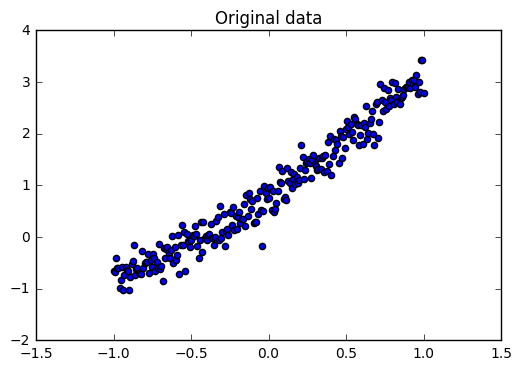

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt
trainsamples = 200
testsamples = 60
#Here we will represent the model, a simple imput, a hidden layer of sigmoid activation
def model(X, hidden_weights1, hidden_bias1, ow):
    hidden_layer =  tf.nn.sigmoid(tf.matmul(X, hidden_weights1)+ b)
    return tf.matmul(hidden_layer, ow)  

dsX = np.linspace(-1, 1, trainsamples + testsamples).transpose()
dsY = 0.4* pow(dsX,2) +2 * dsX + np.random.randn(*dsX.shape) * 0.22 + 0.8
plt.figure() # Create a new figure
plt.title('Original data')
plt.scatter(dsX,dsY) #Plot a scatter draw of the datapoints

In [3]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
# Create first hidden layer
hw1 = tf.Variable(tf.random_normal([1, 10], stddev=0.1))
# Create output connection
ow = tf.Variable(tf.random_normal([10, 1], stddev=0.0))
# Create bias
b = tf.Variable(tf.random_normal([10], stddev=0.1))
model_y = model(X, hw1, b, ow)
# Cost function
cost = tf.pow(model_y-Y, 2)/(2)
# construct an optimizer
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
# Launch the graph in a session
with tf.Session() as sess:
    tf.initialize_all_variables().run() #Initialize all variables
    for i in range(1,100):
        dsX, dsY = shuffle (dsX.transpose(), dsY) #We randomize the samples to mplement a better training
        trainX, trainY =dsX[0:trainsamples], dsY[0:trainsamples]
        for x1,y1 in zip (trainX, trainY):
            sess.run(train_op, feed_dict={X: [[x1]], Y: y1})
        testX, testY = dsX[trainsamples:trainsamples + testsamples], dsY[0:trainsamples:trainsamples+testsamples]
        cost1=0.
        for x1,y1 in zip (testX, testY):
            cost1 += sess.run(cost, feed_dict={X: [[x1]], Y: y1}) / testsamples      
        if (i%10 == 0):
            print("Average cost for epoch " + str (i) + ":" + str(cost1))

Average cost for epoch 10:[[ 0.00181468]]
Average cost for epoch 20:[[ 0.00025832]]
Average cost for epoch 30:[[ 0.00048942]]
Average cost for epoch 40:[[ 0.02964687]]
Average cost for epoch 50:[[ 0.00381252]]
Average cost for epoch 60:[[ 0.04673885]]
Average cost for epoch 70:[[ 0.00183814]]
Average cost for epoch 80:[[ 0.01593663]]
Average cost for epoch 90:[[ 0.00818397]]


### Case 2


AttributeError: 'module' object has no attribute 'TensorFlowDNNRegressor'

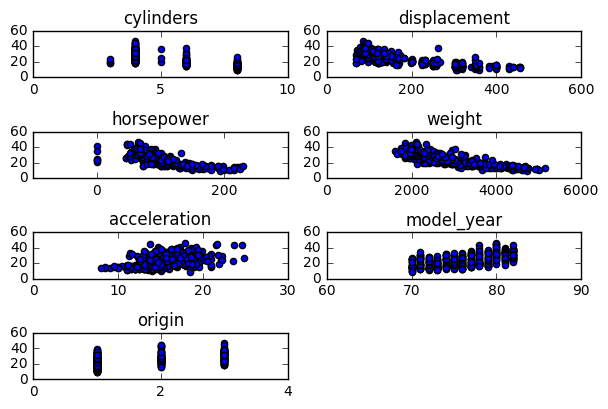

In [4]:
%matplotlib inline  
import matplotlib.pyplot as plt 
import pandas as pd 
 
from sklearn import datasets, cross_validation, metrics 
from sklearn import preprocessing 
import tensorflow.contrib.learn as skflow
 
# Read the original dataset 
df = pd.read_csv("data/mpg.csv", header=0) 
# Convert the displacement column as float 
df['displacement']=df['displacement'].astype(float) 
# We get data columns from the dataset 
# First and last (mpg and car names) are ignored for X 
X = df[df.columns[1:8]] 
y = df['mpg'] 
 
plt.figure() # Create a new figure 
 
for i in range (1,8): 
    number = 420 + i 
    ax1 = plt.subplot(number)
    ax1.locator_params(nbins=3) 
    plt.title(list(df)[i]) 
    ax1.scatter(df[df.columns[i]],y) #Plot a scatter draw of the  datapoints 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 
# Split the datasets 
 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, 
test_size=0.25) 
 
# Scale the data for convergency optimization 
scaler = preprocessing.StandardScaler() 
 
# Set the transform parameters 
X_train = scaler.fit_transform(X_train) 
 
# Build a 2 layer fully connected DNN with 10 and 5 units respectively 
regressor = skflow.TensorFlowDNNRegressor(hidden_units=[10, 5], 
steps=500, learning_rate=0.051, batch_size=1) 
 
# Fit the regressor 
regressor.fit(X_train, y_train) 
 
# Get some metrics based on the X and Y test data 
score = metrics.mean_squared_error(regressor.predict(scaler.transform(X_test)), y_test) 
 
print(" Total Mean Squared Error: " + str(score)) 

### Case 3

In [10]:
import tensorflow as tf
sess = tf.InteractiveSession() 
import pandas as pd 
# Import data 
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

from sklearn.utils import shuffle 
import tensorflow as tf 
 
from sklearn import preprocessing 
 
flags = tf.app.flags 
FLAGS = flags.FLAGS 
 
df = pd.read_csv("./data/wine.csv", header=0) 
print (df.describe()) 
#df['displacement']=df['displacement'].astype(float) 
X = df[df.columns[1:13]].values 
y = df['Wine'].values-1 
Y = tf.one_hot(indices = y, depth=3, on_value = 1., off_value = 0., axis = 1 , name = "a").eval() 
X, Y = shuffle (X, Y) 
 
scaler = preprocessing.StandardScaler() 
X = scaler.fit_transform(X) 
 
# Create the model 
x = tf.placeholder(tf.float32, [None, 12]) 
W = tf.Variable(tf.zeros([12, 3])) 
b = tf.Variable(tf.zeros([3])) 
y = tf.nn.softmax(tf.matmul(x, W) + b) 
 
# Define loss and optimizer 
y_ = tf.placeholder(tf.float32, [None, 3]) 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) 
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy) 
# Train 
tf.initialize_all_variables().run() 
for i in range(100): 
    X,Y =shuffle (X, Y, random_state=1) 

    Xtr=X[0:140,:] 
    Ytr=Y[0:140,:] 

    Xt=X[140:178,:] 
    Yt=Y[140:178,:] 
    Xtr, Ytr = shuffle (Xtr, Ytr, random_state=0) 
    #batch_xs, batch_ys = mnist.train.next_batch(100) 
    batch_xs, batch_ys = Xtr , Ytr 
    train_step.run({x: batch_xs, y_: batch_ys}) 
    cost = sess.run (cross_entropy, feed_dict={x: batch_xs, y_: batch_ys}) 
    # Test trained model 
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
    print(accuracy.eval({x: Xt, y_: Yt}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int 